# Packages

In [1]:
# load libraries
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
import statsmodels.api as sm
import researchpy as rp
import scipy
from scipy import stats as stats
from scipy import stats as cp
import os
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import glob as glob
import statsFuncs.mean_confidence_interval as ms
import plotFuncs
from natsort import natsorted
sns.set(color_codes=True)


# magic functions
%load_ext autoreload
%autoreload 2
%matplotlib inline

# create dummy class for struct-like dataframes


class structtype():
    pass


matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams.update({'axes.labelsize': 16.0})

# Paths 

In [2]:
mainpath = os.getcwd()
groundtruth_path =  mainpath + '/../GroundTruth'

# Load data

In [3]:
data = pd.read_csv('holistic_complete_preprocessed.csv', index_col=0)
realnames = pd.read_csv('pathsForQualtrics_complete.csv')
groundtruth = pd.read_csv(groundtruth_path + '/gender_qualtrics_processed.csv', index_col = 0)
groundtruth.reset_index(inplace=True, drop=True)
groundtruth_paper = pd.read_csv(groundtruth_path + '/paper_gender_correct_data.csv', index_col = 0)
groundtruth_paper.reset_index(inplace=True, drop=True)

# Filter traps 

In [4]:
data_good = data[data['IS_TRAP'] != 'yes']
groundtruth_good = groundtruth[:-4]

# Per Mooney

In [5]:
numImages = len(np.unique(data['IMAGE_NUMBER'])) # 552
papermooneys = np.unique(groundtruth_paper['REAL_NAME'])
numTraps = 4
numImages_nottrap = numImages-numTraps
numSubs = len(np.unique(data['SUBJECTID']))
perMooney = pd.DataFrame(index=range(len(groundtruth_good[groundtruth_good['CORRECT'] != 'Not agreed'])), columns=['SUBJECTID', 'IMAGE_NUMBER', 'REAL_NAME', 'INVERTED', 'UPRIGHT', 'HOLISTIC', 'PAPER', 'PAPER_NUMBER'])

In [6]:
row = 0
# first loop through mooney, then subjects
for mooney in range(int(numImages_nottrap/2)):
    print('Analyzing mooney ' + str(mooney+1) + ' out of ' + str(numImages_nottrap/2))
    correct_answer = groundtruth.loc[mooney, 'CORRECT']

    if correct_answer != 'Not agreed':
    
        for subject in range(numSubs):
#                 print('Analyzing subject ' + str(subject+1) + ' out of ' + str(numSubs))

                # extract that mooney data for that subject
                mooney_data = data_good[(data_good['IMAGE_NUMBER'] == mooney+1) & (data_good['SUBJECTID'] == subject+1)]
                mooney_data_inverted = data_good[(data_good['IMAGE_NUMBER'] == mooney+1 + numImages_nottrap/2) & (data_good['SUBJECTID'] == subject+1)]
                mooney_data.reset_index(inplace=True, drop=True)
                mooney_data_inverted.reset_index(inplace=True, drop=True)

                # get that moooney's correct answer
                correct_answer = groundtruth.loc[mooney, 'CORRECT']

                perMooney.loc[row, 'SUBJECTID'] = subject + 1
                perMooney.loc[row, 'IMAGE_NUMBER'] = mooney + 1


                if mooney_data['RAW_ANSWER'][0] == correct_answer:
                    perMooney.loc[row, 'UPRIGHT'] = 1
                else:
                    perMooney.loc[row, 'UPRIGHT'] = 0

                if mooney_data_inverted['RAW_ANSWER'][0] == correct_answer:
                    perMooney.loc[row, 'INVERTED'] = 1
                else:
                    perMooney.loc[row, 'INVERTED'] = 0

                perMooney.loc[row, 'HOLISTIC'] = perMooney.loc[row, 'UPRIGHT'] - perMooney.loc[row, 'INVERTED']

                perMooney.loc[row, 'IMAGE_NUMBER'] = np.unique(mooney_data['IMAGE_NUMBER'])[0]
                perMooney.loc[row, 'REAL_NAME'] = realnames.loc[mooney, 'NAME']
                
#                 if statsFuncs.ismember(realnames.loc[mooney, 'NAME'], papermooneys):
                if realnames.loc[mooney, 'NAME'] in papermooneys:
                    a = groundtruth_paper[groundtruth_paper['REAL_NAME'] == realnames.loc[mooney, 'NAME']]['PAPER_NUMBER']
                    a.reset_index(inplace=True, drop=True)
                    perMooney.loc[row, 'PAPER'] = 'yes'
                    perMooney.loc[row, 'PAPER_NUMBER'] = a[0]
                else:
                    perMooney.loc[row, 'PAPER'] = 'no'
                    perMooney.loc[row, 'PAPER_NUMBER'] = 0


                row = row + 1


Analyzing mooney 1 out of 274.0
Analyzing mooney 2 out of 274.0
Analyzing mooney 3 out of 274.0
Analyzing mooney 4 out of 274.0
Analyzing mooney 5 out of 274.0
Analyzing mooney 6 out of 274.0
Analyzing mooney 7 out of 274.0
Analyzing mooney 8 out of 274.0
Analyzing mooney 9 out of 274.0
Analyzing mooney 10 out of 274.0
Analyzing mooney 11 out of 274.0
Analyzing mooney 12 out of 274.0
Analyzing mooney 13 out of 274.0
Analyzing mooney 14 out of 274.0
Analyzing mooney 15 out of 274.0
Analyzing mooney 16 out of 274.0
Analyzing mooney 17 out of 274.0
Analyzing mooney 18 out of 274.0
Analyzing mooney 19 out of 274.0
Analyzing mooney 20 out of 274.0
Analyzing mooney 21 out of 274.0
Analyzing mooney 22 out of 274.0
Analyzing mooney 23 out of 274.0
Analyzing mooney 24 out of 274.0
Analyzing mooney 25 out of 274.0
Analyzing mooney 26 out of 274.0
Analyzing mooney 27 out of 274.0
Analyzing mooney 28 out of 274.0
Analyzing mooney 29 out of 274.0
Analyzing mooney 30 out of 274.0
Analyzing mooney 31

Analyzing mooney 246 out of 274.0
Analyzing mooney 247 out of 274.0
Analyzing mooney 248 out of 274.0
Analyzing mooney 249 out of 274.0
Analyzing mooney 250 out of 274.0
Analyzing mooney 251 out of 274.0
Analyzing mooney 252 out of 274.0
Analyzing mooney 253 out of 274.0
Analyzing mooney 254 out of 274.0
Analyzing mooney 255 out of 274.0
Analyzing mooney 256 out of 274.0
Analyzing mooney 257 out of 274.0
Analyzing mooney 258 out of 274.0
Analyzing mooney 259 out of 274.0
Analyzing mooney 260 out of 274.0
Analyzing mooney 261 out of 274.0
Analyzing mooney 262 out of 274.0
Analyzing mooney 263 out of 274.0
Analyzing mooney 264 out of 274.0
Analyzing mooney 265 out of 274.0
Analyzing mooney 266 out of 274.0
Analyzing mooney 267 out of 274.0
Analyzing mooney 268 out of 274.0
Analyzing mooney 269 out of 274.0
Analyzing mooney 270 out of 274.0
Analyzing mooney 271 out of 274.0
Analyzing mooney 272 out of 274.0
Analyzing mooney 273 out of 274.0
Analyzing mooney 274 out of 274.0


# Per mooney across subjects 

In [7]:
perMooneyacrossSubjects = pd.DataFrame(index = range(int(len(perMooney)/numSubs)),
                                    columns = ['MOONEYID',
                                               'REAL_NAME',
                                               'PAPER', 'PAPER_NUMBER', 
                                               'MEAN_HOLISTIC', 'CI_LOWER_HOLISTIC', 'CI_UPPER_HOLISTIC',
                                              'MEAN_UPRIGHT', 'CI_LOWER_UPRIGHT', 'CI_UPPER_UPRIGHT',
                                               'MEAN_INVERTED', 'CI_LOWER_INVERTED', 'CI_UPPER_INVERTED'])


agreed_mooneys = np.unique(perMooney['IMAGE_NUMBER'])
agreed_realnames = np.unique(perMooney['REAL_NAME'])
for mooney in range(int(len(perMooney)/numSubs)):
    mooney_data = perMooney[perMooney['IMAGE_NUMBER'] == agreed_mooneys[mooney]]

    perMooneyacrossSubjects.loc[mooney, 'MOONEYID'] = agreed_mooneys[mooney]
    perMooneyacrossSubjects.loc[mooney, 'REAL_NAME'] = agreed_realnames[mooney]
   
    m, ci_low, ci_up = ms.mean_confidence_interval(np.array(mooney_data['HOLISTIC'], dtype=np.float32))
    
    perMooneyacrossSubjects.loc[mooney, 'MEAN_HOLISTIC'] = m
    perMooneyacrossSubjects.loc[mooney, 'CI_LOWER_HOLISTIC'] = ci_low
    perMooneyacrossSubjects.loc[mooney, 'CI_UPPER_HOLISTIC'] = ci_up
    
    m_upright, ci_low_upright, ci_up_upright = ms.mean_confidence_interval(np.array(mooney_data['UPRIGHT'], dtype=np.float32))
    
    perMooneyacrossSubjects.loc[mooney, 'MEAN_UPRIGHT'] = m_upright
    perMooneyacrossSubjects.loc[mooney, 'CI_LOWER_UPRIGHT'] = ci_low_upright
    perMooneyacrossSubjects.loc[mooney, 'CI_UPPER_UPRIGHT'] = ci_up_upright

    m_inverted, ci_low_inverted, ci_up_inverted = ms.mean_confidence_interval(np.array(mooney_data['INVERTED'], dtype=np.float32))
    
    perMooneyacrossSubjects.loc[mooney, 'MEAN_INVERTED'] = m_inverted
    perMooneyacrossSubjects.loc[mooney, 'CI_LOWER_INVERTED'] = ci_low_inverted
    perMooneyacrossSubjects.loc[mooney, 'CI_UPPER_INVERTED'] = ci_up_inverted
    
    perMooneyacrossSubjects.loc[mooney, 'PAPER'] = np.unique(mooney_data['PAPER'])[0]
    if perMooneyacrossSubjects.loc[mooney, 'PAPER'] == 'yes':
        perMooneyacrossSubjects.loc[mooney, 'PAPER_NUMBER'] = np.unique(mooney_data['PAPER_NUMBER'])[0]


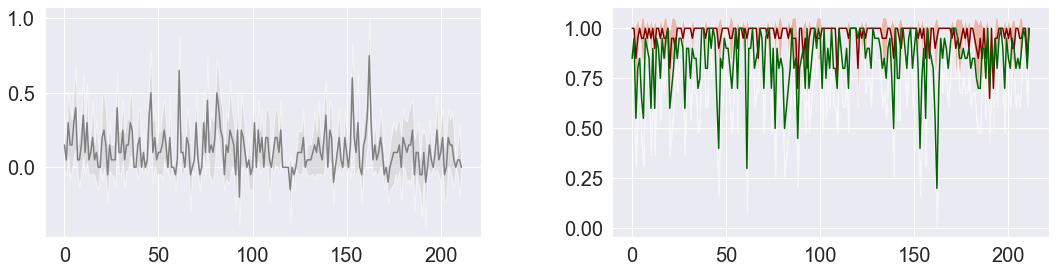

In [8]:

fig, axs = plt.subplots(1, 2, figsize=(18,4))
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.2)
x = range(len(perMooneyacrossSubjects))
axs[0].plot(perMooneyacrossSubjects.index, perMooneyacrossSubjects['MEAN_HOLISTIC'], alpha = 1, color = 'gray', label='HOLISTIC INDEX')
axs[0].fill_between(perMooneyacrossSubjects.index, 
                np.array(perMooneyacrossSubjects['CI_LOWER_HOLISTIC'], dtype=np.float32), np.array(perMooneyacrossSubjects['CI_UPPER_HOLISTIC'], dtype=np.float32),
                facecolor='lightgrey', alpha=0.6)

xlabelPlot = 'MooneyID'
ylabelPlot = 'Holistic Index'
# axs[0] = plotFuncs.plotStyleBegin(axs[0], 18, 14, '',  xlabelPlot, ylabelPlot)

axs[1].plot(perMooneyacrossSubjects.index, perMooneyacrossSubjects['MEAN_UPRIGHT'], alpha = 1, color = 'maroon', label='Upright')
axs[1].fill_between(perMooneyacrossSubjects.index, 
                np.array(perMooneyacrossSubjects['CI_LOWER_UPRIGHT'], dtype=np.float32),
                    np.array(perMooneyacrossSubjects['CI_UPPER_UPRIGHT'], dtype=np.float32),
                facecolor='darksalmon', alpha=0.6)

axs[1].plot(perMooneyacrossSubjects.index, perMooneyacrossSubjects['MEAN_INVERTED'], alpha = 1, color = 'darkgreen', label='Inverted')
axs[1].fill_between(perMooneyacrossSubjects.index, 
                np.array(perMooneyacrossSubjects['CI_LOWER_INVERTED'], dtype=np.float32),
                    np.array(perMooneyacrossSubjects['CI_LOWER_INVERTED'], dtype=np.float32),
                facecolor='darkseagreen', alpha=0.6)


In [9]:
perMooneyacrossSubjects.to_csv('perMooney_gender_complete.csv')
perMooneyacrossSubjects[perMooneyacrossSubjects['PAPER'] == 'yes'].to_csv('paper_complete_holistic_gender.csv')

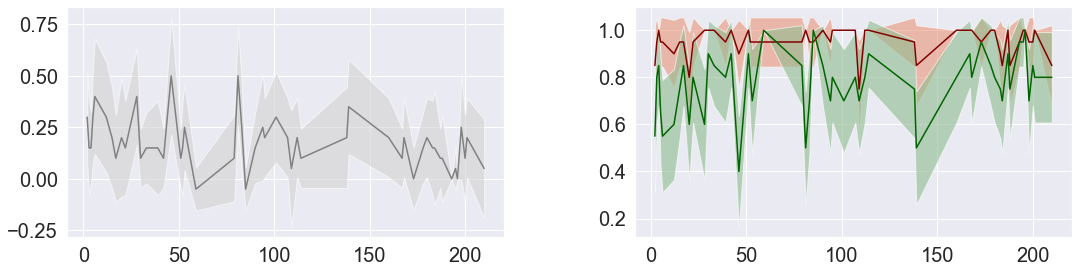

In [10]:
paper_yes = perMooneyacrossSubjects[perMooneyacrossSubjects['PAPER'] == 'yes']
fig, axs = plt.subplots(1, 2, figsize=(18,4))
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.2)
x = range(len(paper_yes))
axs[0].plot(paper_yes.index, paper_yes['MEAN_HOLISTIC'], alpha = 1, color = 'gray', label='HOLISTIC INDEX')
axs[0].fill_between(paper_yes.index, 
                np.array(paper_yes['CI_LOWER_HOLISTIC'], dtype=np.float32), np.array(paper_yes['CI_UPPER_HOLISTIC'], dtype=np.float32),
                facecolor='lightgrey', alpha=0.6)

xlabelPlot = 'MooneyID'
ylabelPlot = 'Holistic Index'
# axs[0] = plotFuncs.plotStyleBegin(axs[0], 18, 14, '',  xlabelPlot, ylabelPlot)

axs[1].plot(paper_yes.index, paper_yes['MEAN_UPRIGHT'], alpha = 1, color = 'maroon', label='Upright')
axs[1].fill_between(paper_yes.index, 
                np.array(paper_yes['CI_LOWER_UPRIGHT'], dtype=np.float32),
                    np.array(paper_yes['CI_UPPER_UPRIGHT'], dtype=np.float32),
                facecolor='darksalmon', alpha=0.6)

axs[1].plot(paper_yes.index, paper_yes['MEAN_INVERTED'], alpha = 1, color = 'darkgreen', label='Inverted')
axs[1].fill_between(paper_yes.index, 
                np.array(paper_yes['CI_LOWER_INVERTED'], dtype=np.float32),
                    np.array(paper_yes['CI_UPPER_INVERTED'], dtype=np.float32),
                facecolor='darkseagreen', alpha=0.6)


# Differences upright and inverted 

In [22]:
perMooneyacrossSubjects.std()

MOONEYID             78.782458
PAPER_NUMBER         28.536581
MEAN_HOLISTIC         0.135530
CI_LOWER_HOLISTIC     0.109830
CI_UPPER_HOLISTIC     0.195450
MEAN_UPRIGHT          0.058397
CI_LOWER_UPRIGHT      0.121186
CI_UPPER_UPRIGHT      0.028128
MEAN_INVERTED         0.142421
CI_LOWER_INVERTED     0.210512
CI_UPPER_INVERTED     0.091438
dtype: float64

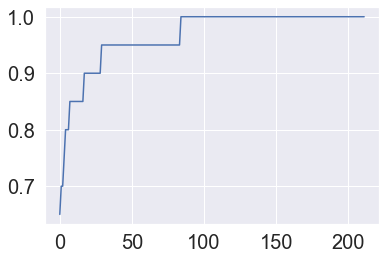

In [20]:
plt.plot(sorted(perMooneyacrossSubjects['MEAN_UPRIGHT']))

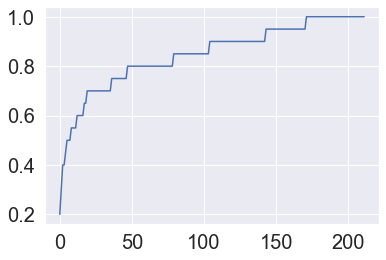

In [21]:
plt.plot(sorted(perMooneyacrossSubjects['MEAN_INVERTED']))

# Split half 

In [30]:
first_half = perMooney[perMooney['SUBJECTID'] < 10]
second_half = perMooney[perMooney['SUBJECTID'] >= 10]

In [31]:
perMooney_firsthalf = pd.DataFrame(index=range(79),
                          columns = ['MOONEYID', 'REP1_UPRIGHT', 'CI_LOWER_UPRIGHT', 'CI_UPPER_UPRIGHT',
                                     'REP1_INVERTED', 'CI_LOWER_INVERTED', 'CI_UPPER_INVERTED',
                                     'REP1_HOLISTIC', 'CI_LOWER_HOLISTIC', 'CI_UPPER_HOLISTIC'])

perMooney_secondhalf = pd.DataFrame(index=range(79),
                          columns = ['MOONEYID', 'REP1_UPRIGHT', 'CI_LOWER_UPRIGHT', 'CI_UPPER_UPRIGHT',
                                     'REP1_INVERTED', 'CI_LOWER_INVERTED', 'CI_UPPER_INVERTED',
                                     'REP1_HOLISTIC', 'CI_LOWER_HOLISTIC', 'CI_UPPER_HOLISTIC'])



In [32]:
for mooney in range(int(len(perMooney)/numSubs)):
    mooney_data = first_half[first_half['IMAGE_NUMBER'] == agreed_mooneys[mooney]]
    
    
    perMooney_firsthalf.loc[mooney, 'MOONEYID'] = agreed_mooneys[mooney]
    
    m, ci_low, ci_up = ms.mean_confidence_interval(np.array(mooney_data['HOLISTIC'], dtype=np.float32))
    
    perMooney_firsthalf.loc[mooney, 'MEAN_HOLISTIC'] = m
    perMooney_firsthalf.loc[mooney, 'CI_LOWER_HOLISTIC'] = ci_low
    perMooney_firsthalf.loc[mooney, 'CI_UPPER_HOLISTIC'] = ci_up
    
    m_upright, ci_low_upright, ci_up_upright = ms.mean_confidence_interval(np.array(mooney_data['UPRIGHT'], dtype=np.float32))
    
    perMooney_firsthalf.loc[mooney, 'MEAN_UPRIGHT'] = m_upright
    perMooney_firsthalf.loc[mooney, 'CI_LOWER_UPRIGHT'] = ci_low_upright
    perMooney_firsthalf.loc[mooney, 'CI_UPPER_UPRIGHT'] = ci_up_upright

    m_inverted, ci_low_inverted, ci_up_inverted = ms.mean_confidence_interval(np.array(mooney_data['INVERTED'], dtype=np.float32))
    
    perMooney_firsthalf.loc[mooney, 'MEAN_INVERTED'] = m_inverted
    perMooney_firsthalf.loc[mooney, 'CI_LOWER_INVERTED'] = ci_low_inverted
    perMooney_firsthalf.loc[mooney, 'CI_UPPER_INVERTED'] = ci_up_inverted

In [33]:
for mooney in range(int(len(perMooney)/numSubs)):
    mooney_data = second_half[second_half['IMAGE_NUMBER'] == agreed_mooneys[mooney]]
    
    
    perMooney_secondhalf.loc[mooney, 'MOONEYID'] = agreed_mooneys[mooney]
    
    m, ci_low, ci_up = ms.mean_confidence_interval(np.array(mooney_data['HOLISTIC'], dtype=np.float32))
    
    perMooney_secondhalf.loc[mooney, 'MEAN_HOLISTIC'] = m
    perMooney_secondhalf.loc[mooney, 'CI_LOWER_HOLISTIC'] = ci_low
    perMooney_secondhalf.loc[mooney, 'CI_UPPER_HOLISTIC'] = ci_up
    
    m_upright, ci_low_upright, ci_up_upright = ms.mean_confidence_interval(np.array(mooney_data['UPRIGHT'], dtype=np.float32))
    
    perMooney_secondhalf.loc[mooney, 'MEAN_UPRIGHT'] = m_upright
    perMooney_secondhalf.loc[mooney, 'CI_LOWER_UPRIGHT'] = ci_low_upright
    perMooney_secondhalf.loc[mooney, 'CI_UPPER_UPRIGHT'] = ci_up_upright

    m_inverted, ci_low_inverted, ci_up_inverted = ms.mean_confidence_interval(np.array(mooney_data['INVERTED'], dtype=np.float32))
    
    perMooney_secondhalf.loc[mooney, 'MEAN_INVERTED'] = m_inverted
    perMooney_secondhalf.loc[mooney, 'CI_LOWER_INVERTED'] = ci_low_inverted
    perMooney_secondhalf.loc[mooney, 'CI_UPPER_INVERTED'] = ci_up_inverted

In [34]:
corr, _ = stats.pearsonr(perMooney_firsthalf['MEAN_HOLISTIC'], perMooney_secondhalf['MEAN_HOLISTIC'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.478


# Select higher and lower holistic

In [35]:
ordered_mooneys = perMooneyacrossSubjects.sort_values(by='MEAN_HOLISTIC')

# drop the ones with negative holistic
for i in range(len(ordered_mooneys)):
    if ordered_mooneys.loc[i, 'MEAN_HOLISTIC'] < 0:
        ordered_mooneys.drop(i, inplace=True)


select 20 higher and 20 lower, that means the 20 first and the 20 last


In [36]:
low_holistic = ordered_mooneys.iloc[range(20), :]

In [37]:
high_holistic = ordered_mooneys[-20:]

In [38]:
low_holistic.to_csv('select_low_holistic.csv')
high_holistic.to_csv('select_high_holistic.csv')


In [39]:
high_holistic

,MOONEYID,REAL_NAME,PAPER,PAPER_NUMBER,MEAN_HOLISTIC,CI_LOWER_HOLISTIC,CI_UPPER_HOLISTIC,MEAN_UPRIGHT,CI_LOWER_UPRIGHT,CI_UPPER_UPRIGHT,MEAN_INVERTED,CI_LOWER_INVERTED,CI_UPPER_INVERTED
2,4,U0006.bmp,yes,2,0.3,0.0799573,0.520043,0.85,0.678544,1.02146,0.55,0.311117,0.788883
70,95,U0155.bmp,no,NaN,0.3,0.0799573,0.520043,1,1,1,0.7,0.479957,0.920043
35,49,U0076.bmp,no,NaN,0.3,0.0799573,0.520043,1,1,1,0.7,0.479957,0.920043
163,213,U0362.bmp,no,NaN,0.3,0.0799573,0.520043,1,1,1,0.7,0.479957,0.920043
101,139,U0228.bmp,yes,57,0.3,0.0799573,0.520043,1,1,1,0.7,0.479957,0.920043
74,99,U0159.bmp,no,NaN,0.3,0.0799573,0.520043,1,1,1,0.7,0.479957,0.920043
156,206,U0346.bmp,no,NaN,0.3,-0.00746049,0.607461,0.85,0.678544,1.02146,0.55,0.311117,0.788883
161,211,U0359.bmp,no,NaN,0.35,0.120972,0.579028,0.9,0.755948,1.04405,0.55,0.311117,0.788883
139,186,U0312.bmp,yes,68,0.35,0.120972,0.579028,0.85,0.678544,1.02146,0.5,0.259914,0.740086
10,14,U0020.bmp,no,NaN,0.35,0.0752086,0.624791,0.95,0.845349,1.05465,0.6,0.364764,0.835236


In [40]:
perMooneyacrossSubjects.sort_values(by=['MEAN_HOLISTIC'], inplace=True)

perMooneyacrossSubjects_ordered = perMooneyacrossSubjects.reset_index()

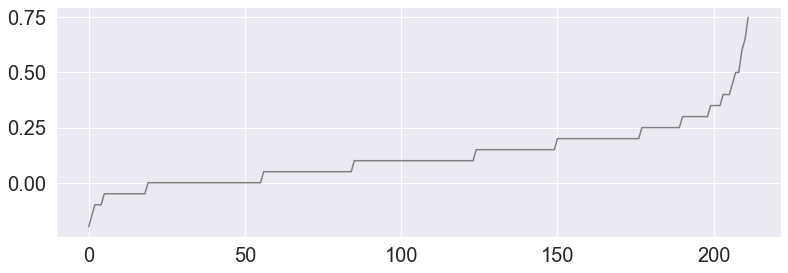

In [42]:
fig, axs = plt.subplots(1, 1, figsize=(13,4))
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.2)
x = range(len(perMooneyacrossSubjects_ordered))
axs.plot(perMooneyacrossSubjects_ordered.index, perMooneyacrossSubjects_ordered['MEAN_HOLISTIC'], alpha = 1, color = 'gray', label='HOLISTIC INDEX')
# axs.fill_between(perMooneyacrossSubjects_ordered.index, 
#                 perMooneyacrossSubjects_ordered['CI_LOWER_HOLISTIC'], perMooneyacrossSubjects_ordered['CI_UPPER_HOLISTIC'],
#                 facecolor='lightgrey', alpha=0.6)


xlabelPlot = 'Mooney Face Number'
ylabelPlot = 'Holistic index\n across Mooney faces'
# axs = plotFuncs.plotStyleBegin(axs, 18, 14, '',  xlabelPlot, ylabelPlot)


# Descriptives of two groups 

In [43]:
low_holistic

,MOONEYID,REAL_NAME,PAPER,PAPER_NUMBER,MEAN_HOLISTIC,CI_LOWER_HOLISTIC,CI_UPPER_HOLISTIC,MEAN_UPRIGHT,CI_LOWER_UPRIGHT,CI_UPPER_UPRIGHT,MEAN_INVERTED,CI_LOWER_INVERTED,CI_UPPER_INVERTED
64,88,U0142.bmp,no,NaN,0,0,0,1,1,1,1,1,1
173,223,U0377.bmp,yes,72,0,-0.151844,0.151844,0.95,0.845349,1.05465,0.95,0.845349,1.05465
37,52,U0080.bmp,no,NaN,0,0,0,1,1,1,1,1,1
38,53,U0084.bmp,no,NaN,0,0,0,1,1,1,1,1,1
41,59,U0095.bmp,no,NaN,0,0,0,1,1,1,1,1,1
97,135,U0220.bmp,no,NaN,0,0,0,1,1,1,1,1,1
179,230,U0395.bmp,no,NaN,0,-0.21474,0.21474,0.9,0.755948,1.04405,0.9,0.755948,1.04405
171,221,U0374.bmp,no,NaN,0,0,0,1,1,1,1,1,1
151,199,U0331.bmp,no,NaN,0,0,0,1,1,1,1,1,1
58,80,U0133.bmp,no,NaN,0,0,0,1,1,1,1,1,1


In [48]:
print('Mean: ' + str(np.mean(high_holistic['MEAN_HOLISTIC'])))
print('SEM: ' + str(stats.sem(high_holistic['MEAN_HOLISTIC'])))

Mean: 0.4074999809265137
SEM: 0.029306680625806224


In [49]:
print('Mean: ' + str(np.mean(low_holistic['MEAN_HOLISTIC'])))
print('SEM: ' + str(stats.sem(low_holistic['MEAN_HOLISTIC'])))

Mean: 0.0
SEM: 0.0


In [50]:
stats.ttest_rel(low_holistic['MEAN_HOLISTIC'],high_holistic['MEAN_HOLISTIC'])

Ttest_relResult(statistic=-13.90467956713714, pvalue=2.0727640119868704e-11)

In [51]:
stats.wilcoxon(low_holistic['MEAN_HOLISTIC'],high_holistic['MEAN_HOLISTIC'])

WilcoxonResult(statistic=0.0, pvalue=7.999968265020404e-05)

In [56]:
import pingouin
pingouin.wilcoxon(pd.to_numeric(low_holistic['MEAN_HOLISTIC']), pd.to_numeric(high_holistic['MEAN_HOLISTIC']))

,W-val,tail,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.000087,-1.0,0.0
